In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
from random import randint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import InputLayer
import numpy as np
import json
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Extract input and labels
with open('/drive/My Drive/6.7900 project/reviews_amazon_instant_video_twitterglove.npy', 'rb') as f:
    input = np.load(f, allow_pickle=True)
    labels = np.load(f, allow_pickle=True)

In [ ]:
# Architecture
model = Sequential()
model.add(InputLayer(input_shape=(input.shape[1], input.shape[2]), name='Input_Layer'))
model.add(LSTM(50, return_sequences=True, name='LSTM1'))
model.add(Dropout(0.5, name='Dropout1'))
model.add(LSTM(50, return_sequences=True, name='LSTM2'))
model.add(Dropout(0.5, name='Dropout2'))
model.add(LSTM(50, name='LSTM3'))
model.add(Dense(5, activation='softmax', name='Dense'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 200, 50)           15200     
                                                                 
 Dropout1 (Dropout)          (None, 200, 50)           0         
                                                                 
 LSTM2 (LSTM)                (None, 200, 50)           20200     
                                                                 
 Dropout2 (Dropout)          (None, 200, 50)           0         
                                                                 
 LSTM3 (LSTM)                (None, 50)                20200     
                                                                 
 Dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 55,855
Trainable params: 55,855
Non-traina

In [ ]:
# Training
training = model.fit(input, labels, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
929/929 [==============================] - 318s 336ms/step - loss: 1.1389 - accuracy: 0.5590 - val_loss: 1.0869 - val_accuracy: 0.5720
Epoch 2/10
929/929 [==============================] - 308s 331ms/step - loss: 1.0649 - accuracy: 0.5657 - val_loss: 1.0731 - val_accuracy: 0.5768
Epoch 3/10
929/929 [==============================] - 307s 331ms/step - loss: 1.0332 - accuracy: 0.5763 - val_loss: 1.0116 - val_accuracy: 0.5914
Epoch 4/10
929/929 [==============================] - 307s 331ms/step - loss: 1.0045 - accuracy: 0.5838 - val_loss: 0.9976 - val_accuracy: 0.6010
Epoch 5/10
929/929 [==============================] - 305s 328ms/step - loss: 0.9819 - accuracy: 0.5943 - val_loss: 0.9805 - val_accuracy: 0.6072
Epoch 6/10
929/929 [==============================] - 310s 334ms/step - loss: 0.9661 - accuracy: 0.6015 - val_loss: 0.9795 - val_accuracy: 0.6052
Epoch 7/10
929/929 [==============================] - 307s 331ms/step - loss: 0.9566 - accuracy: 0.6014 - val_loss: 0.9763 -

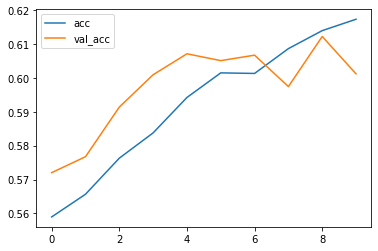

In [ ]:
# Plot Accuracy
plt.plot(training.history['accuracy'], label='acc')
plt.plot(training.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

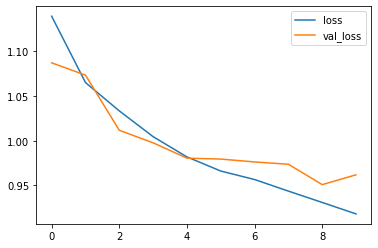

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Loss
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")